Sensitivity analysis is important for several reasons. In many applications, the values of
an LP’s parameters may change. For example, the prices at which soldiers and trains are
sold or the availability of carpentry and finishing hours may change. If a parameter
changes, then sensitivity analysis often makes it unnecessary to solve the problem again. A knowledge of sensitivity
analysis often enables the analyst to determine from the original solution how
changes in an LP’s parameters change its optimal solution.

Now consider the following example:
\begin{equation}
\begin{aligned}
\max_{} \quad & z=3x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq 100,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

In [25]:
# import PuLP for solving the LP
import pulp
import numpy as np
import matplotlib.pyplot as plt
 # import all functions from matplotlib library 
from matplotlib.pyplot import *
 # import arange function from numpy library, which helps us to set the graph
from numpy import arange 


In [26]:
# First define the figure to save the graph on
figure()
# define a domain for x1, x2 and the increment. For instance, we assume that x1 and x2 are between 0 and 10 with increment 1.
x=arange(0,100,1)
y=arange(0,100,1)

<Figure size 432x288 with 0 Axes>

In [45]:
y1=100-2*x
y2=80-x
y3=40
y4=90-1.5*x



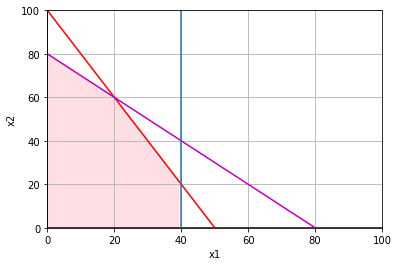

In [28]:
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plt.axvline(x=40)

# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)

In [29]:
z = pulp.LpProblem('Lect10_ex1', pulp.LpMaximize)



In [30]:
x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)

In [31]:
# Objective function
z += 3*x1 + 2*x2

In [32]:
# constraints 
z += 2*x1 + x2 <= 100
z += x1 + x2 <= 80
z+=x1<=40

In [33]:
z

Lect10_ex1:
MAXIMIZE
3*x1 + 2*x2 + 0
SUBJECT TO
_C1: 2 x1 + x2 <= 100

_C2: x1 + x2 <= 80

_C3: x1 <= 40

VARIABLES
x1 Continuous
x2 Continuous

In [34]:
pulp.LpStatus[z.solve()]


'Optimal'

In [35]:
for variable in z.variables():
    print ("{} = {}".format(variable.name, variable.varValue))

x1 = 20.0
x2 = 60.0


In [36]:
print ("z=", pulp.value(z.objective))


z= 180.0


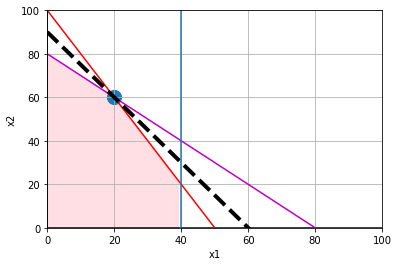

In [54]:
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plot(x,y4, '--',linewidth=4, color='k')
plt.axvline(x=40)
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
plt.scatter(20, 60, s=200)


Grapghical Analysis of the Effect of a change in an objective function:
Now consider the following example:
\begin{equation}
\begin{aligned}
\max_{} \quad & z=c_1x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq 100,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}
For what values of c_1 the point (20,60) remain optimal?

we see that if a change in $c_1$ causes the isoprofit lines to be flatter than the the second constraint line (slope of this line is -1), then the optimal solution will change from the current optimal solution to (0,80). If the isoprofit lines are steeper than the first constraint line (slope of this line -2), then the optimal solution
will change from point the current optimal solution to (40,20).


Now we change the objective function coefficients as follows: 
\begin{equation}
\begin{aligned}
\max_{} \quad & z=x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq 100,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

x1 = 0.0
x2 = 80.0
z= 160.0


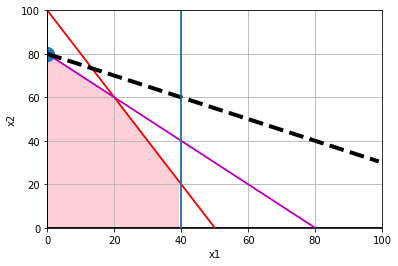

In [75]:
# First define the figure to save the graph on
figure()
# define a domain for x1, x2 and the increment. For instance, we assume that x1 and x2 are between 0 and 10 with increment 1.
x=arange(0,100,1)
y=arange(0,100,1)
#######################################
y1=100-2*x
y2=80-x
y3=40
y4=80-0.5*x
###############################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plt.axvline(x=40)

# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
##################################################################
z = pulp.LpProblem('Lect10_ex1', pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)
######################################################
# Objective function
z += x1 + 2*x2
# constraints 
z += 2*x1 + x2 <= 100
z += x1 + x2 <= 80
z+=x1<=40
z
#########################################################
pulp.LpStatus[z.solve()]
#######################################################
for variable in z.variables():
    print ("{} = {}".format(variable.name, variable.varValue))
##################################################
print ("z=", pulp.value(z.objective))
###########################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plot(x,y4, '--',linewidth=4, color='k')
plt.axvline(x=40)
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
plt.scatter(0, 80, s=200)


Now we change the objective function coefficients as follows: 
\begin{equation}
\begin{aligned}
\max_{} \quad & z=6x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq 100,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

x1 = 40.0
x2 = 20.0
z= 280.0


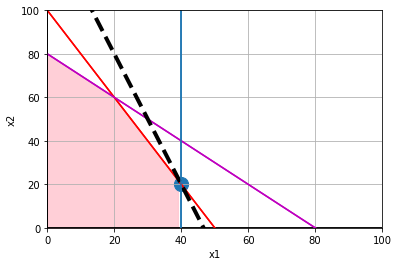

In [76]:
# First define the figure to save the graph on
figure()
# define a domain for x1, x2 and the increment. For instance, we assume that x1 and x2 are between 0 and 10 with increment 1.
x=arange(0,100,1)
y=arange(0,100,1)
#######################################
y1=100-2*x
y2=80-x
y3=40
y4=140-3*x
###############################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plt.axvline(x=40)

# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
##################################################################
z = pulp.LpProblem('Lect10_ex1', pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)
######################################################
# Objective function
z += 6*x1 + 2*x2
# constraints 
z += 2*x1 + x2 <= 100
z += x1 + x2 <= 80
z+=x1<=40
z
#########################################################
pulp.LpStatus[z.solve()]
#######################################################
for variable in z.variables():
    print ("{} = {}".format(variable.name, variable.varValue))
##################################################
print ("z=", pulp.value(z.objective))
###########################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plot(x,y4, '--',linewidth=4, color='k')
plt.axvline(x=40)
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
plt.scatter(40, 20, s=200)


if all other parameters remain unchanged, the current basic variables remain optimal for $2\leq c_1\leq 4$.

Graphical Analysis of the Effect of a Change in a Right-Hand Side on the LP’s Optimal Solution:

A graphical analysis can also be used to determine whether a change in the right-hand side of a constraint will make the current basis no longer optimal.

Now we change the right-hand side of a constraints as follows: 
\begin{equation}
\begin{aligned}
\max_{} \quad & z=3x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq b_1,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

For what values of $b_1$ does the current bfs ($x_1=20,x_2=60$) remain optimal?

We will see if all other parameters remain unchanged, the current basic variables remain
optimal if $80 \leq b_1 \leq 120$ (Why?).

First, consider 
\begin{equation}
\begin{aligned}
\max_{} \quad & z=3x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq 80,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

x1 = 0.0
x2 = 80.0
z= 160.0


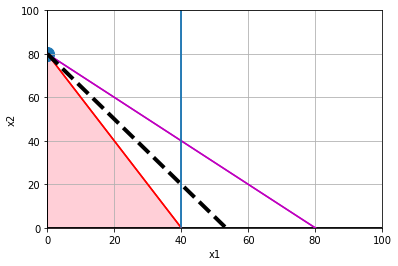

In [79]:
# import PuLP for solving the LP
import pulp
import numpy as np
import matplotlib.pyplot as plt
 # import all functions from matplotlib library 
from matplotlib.pyplot import *
 # import arange function from numpy library, which helps us to set the graph
from numpy import arange 
# First define the figure to save the graph on
figure()
# define a domain for x1, x2 and the increment. For instance, we assume that x1 and x2 are between 0 and 10 with increment 1.
x=arange(0,100,1)
y=arange(0,100,1)
#######################################
#constraints
y1=80-2*x
y2=80-x
y3=40
#isoprofit line
y4=80-1.5*x
###############################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plt.axvline(x=40)

# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
##################################################################
z = pulp.LpProblem('Lect10_ex1', pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)
######################################################
# Objective function
z += 3*x1 + 2*x2
# constraints 
z += 2*x1 + x2 <= 80
z += x1 + x2 <= 80
z+=x1<=40
z
#########################################################
pulp.LpStatus[z.solve()]
#######################################################
for variable in z.variables():
    print ("{} = {}".format(variable.name, variable.varValue))
##################################################
print ("z=", pulp.value(z.objective))
###########################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plot(x,y4, '--',linewidth=4, color='k')
plt.axvline(x=40)
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
plt.scatter(0, 80, s=200)


Now, consider 
\begin{equation}
\begin{aligned}
\max_{} \quad & z=3x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq 70,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

x1 = 0.0
x2 = 70.0
z= 140.0


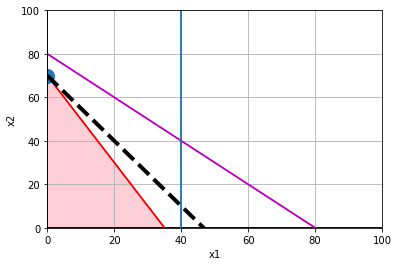

In [82]:
# import PuLP for solving the LP
import pulp
import numpy as np
import matplotlib.pyplot as plt
 # import all functions from matplotlib library 
from matplotlib.pyplot import *
 # import arange function from numpy library, which helps us to set the graph
from numpy import arange 
# First define the figure to save the graph on
figure()
# define a domain for x1, x2 and the increment. For instance, we assume that x1 and x2 are between 0 and 10 with increment 1.
x=arange(0,100,1)
y=arange(0,100,1)
#######################################
#constraints
y1=70-2*x
y2=80-x
y3=40
#isoprofit line
y4=70-1.5*x
###############################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plt.axvline(x=40)

# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
##################################################################
z = pulp.LpProblem('Lect10_ex1', pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)
######################################################
# Objective function
z += 3*x1 + 2*x2
# constraints 
z += 2*x1 + x2 <= 70
z += x1 + x2 <= 80
z+=x1<=40
z
#########################################################
pulp.LpStatus[z.solve()]
#######################################################
for variable in z.variables():
    print ("{} = {}".format(variable.name, variable.varValue))
##################################################
print ("z=", pulp.value(z.objective))
###########################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plot(x,y4, '--',linewidth=4, color='k')
plt.axvline(x=40)
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
plt.scatter(0, 70, s=200)


You can see that $s_2$, which is corresponding to the purple line is a basic variable now. 

Now, consider 
\begin{equation}
\begin{aligned}
\max_{} \quad & z=3x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq 120,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

x1 = 40.0
x2 = 40.0
z= 200.0


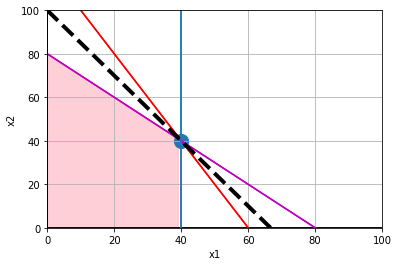

In [85]:
# import PuLP for solving the LP
import pulp
import numpy as np
import matplotlib.pyplot as plt
 # import all functions from matplotlib library 
from matplotlib.pyplot import *
 # import arange function from numpy library, which helps us to set the graph
from numpy import arange 
# First define the figure to save the graph on
figure()
# define a domain for x1, x2 and the increment. For instance, we assume that x1 and x2 are between 0 and 10 with increment 1.
x=arange(0,100,1)
y=arange(0,100,1)
#######################################
#constraints
y1=120-2*x
y2=80-x
y3=40
#isoprofit line
y4=100-1.5*x
###############################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plt.axvline(x=40)

# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
##################################################################
z = pulp.LpProblem('Lect10_ex1', pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)
######################################################
# Objective function
z += 3*x1 + 2*x2
# constraints 
z += 2*x1 + x2 <= 120
z += x1 + x2 <= 80
z+=x1<=40
z
#########################################################
pulp.LpStatus[z.solve()]
#######################################################
for variable in z.variables():
    print ("{} = {}".format(variable.name, variable.varValue))
##################################################
print ("z=", pulp.value(z.objective))
###########################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plot(x,y4, '--',linewidth=4, color='k')
plt.axvline(x=40)
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
plt.scatter(40, 40, s=200)


For $b_1=120$, the basic variables are still $x_1$ and $x_2$ because they are nonzero.

But for $b_1 >120$, the basic variables will be changed. Consider 
Now, consider 
\begin{equation}
\begin{aligned}
\max_{} \quad & z=3x_1+2x_2     \\
\textrm{   s.t.} \quad & 2x_1+x_2\leq 130,\\
  &x_1+x_2\leq 80 ,   \\
    &x_1\leq 40,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

x1 = 40.0
x2 = 40.0
z= 200.0


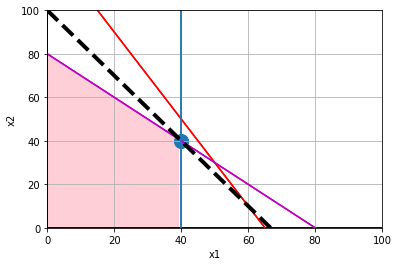

In [87]:
# import PuLP for solving the LP
import pulp
import numpy as np
import matplotlib.pyplot as plt
 # import all functions from matplotlib library 
from matplotlib.pyplot import *
 # import arange function from numpy library, which helps us to set the graph
from numpy import arange 
# First define the figure to save the graph on
figure()
# define a domain for x1, x2 and the increment. For instance, we assume that x1 and x2 are between 0 and 10 with increment 1.
x=arange(0,100,1)
y=arange(0,100,1)
#######################################
#constraints
y1=130-2*x
y2=80-x
y3=40
#isoprofit line
y4=100-1.5*x
###############################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plt.axvline(x=40)

# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
##################################################################
z = pulp.LpProblem('Lect10_ex1', pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)
######################################################
# Objective function
z += 3*x1 + 2*x2
# constraints 
z += 2*x1 + x2 <= 130
z += x1 + x2 <= 80
z+=x1<=40
z
#########################################################
pulp.LpStatus[z.solve()]
#######################################################
for variable in z.variables():
    print ("{} = {}".format(variable.name, variable.varValue))
##################################################
print ("z=", pulp.value(z.objective))
###########################################
xlim(0,100)
ylim(0,100)
hlines(0,0,100,color='k')
vlines(0,0,100,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
plot(x,y4, '--',linewidth=4, color='k')
plt.axvline(x=40)
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, where= x<40, color='pink',alpha=0.5)
plt.scatter(40, 40, s=200)


As you see above, the basic variables are changed.